In [1]:
import numpy as np
from quantumoperators import *
import matplotlib.pyplot as plt
from hamiltonianoperators import *

In [8]:
def set_fontsize(ax, fs):
    """
    Small function to set font sizes for figures
    """
    ax.tick_params(axis='both', which='major', labelsize=fs)
    ax.tick_params(axis='both', which='minor', labelsize=fs)
    ax.xaxis.label.set_size(fs)
    ax.yaxis.label.set_size(fs)
    ax.yaxis.offsetText.set_fontsize(fs)
    ax.title.set_size(fs)

In [9]:
Ham = Hamiltonian(6,0.5,0.5)

In [10]:
Ez = np.linspace(19.8,20.2,101)*1e3
Ex = np.zeros(len(Ez))
Ey = np.zeros(len(Ez))
Bx = np.zeros(len(Ez))
By = np.zeros(len(Ez))
Bz = np.zeros(len(Ez))

spectrum = Ham.spectrum(Ex,Ey,Ez,Bx,By,Bz)

In [11]:
freq_shift_func_field = (spectrum[0][:,10] - spectrum[0][:,7]).ptp() / (Ez/1e3).ptp()
print(f"frequency shift slope = {freq_shift_func_field:.2f} Hz/kV/cm" )

frequency shift slope = 20.21 Hz/kV/cm


In [12]:
Ec = 20e3
Enr = 2
freq_shift = (Ham.spectrum(0,0,Ec+Enr,0,0,0)[0][10] - Ham.spectrum(0,0,Ec+Enr,0,0,0)[0][7]) - (Ham.spectrum(0,0,-Ec+Enr,0,0,0)[0][10] - Ham.spectrum(0,0,-Ec+Enr,0,0,0)[0][7])
print(f"frequency shift = {freq_shift*1e3:.2f} mHz")

frequency shift = -80.90 mHz


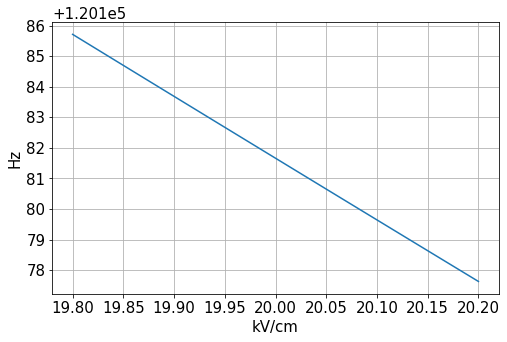

In [13]:
fig, ax= plt.subplots(figsize = (8,5))
ax.plot(Ez/1e3, spectrum[0][:,10] - spectrum[0][:,7])

ax.set_xlabel('kV/cm')
ax.set_ylabel('Hz')
ax.grid(True)
set_fontsize(ax, 15)

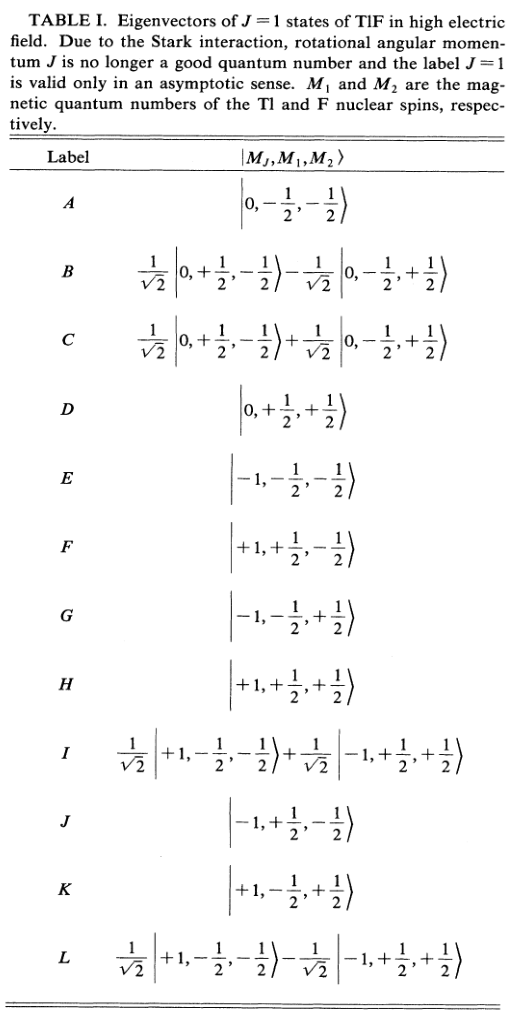

In [14]:
states = Ham.eigenstates(0,0,30e3,0,0,0,1e-1)
Jselect = 1
Jstart = (4*(2*(Jselect-1)+1))
Jstop = Jstart + 4*(2*Jselect + 1)
for idx, state in enumerate(states[1]):
    if (idx >= Jstart) & (idx < Jstop):
        print(idx)
        for dat in state.data:
                J = dat[1].J
                mJ = dat[1].mJ
                m1 = dat[1].m1
                m2 = dat[1].m2
                print(f'{dat[0].real:.2f} : {J:+d} {mJ:+d} {m1:+0.1f} {m2:+0.1f}')

4
-0.29 : +3 +1 -0.5 -0.5
0.29 : +3 -1 +0.5 +0.5
-0.77 : +2 +1 -0.5 -0.5
0.77 : +2 -1 +0.5 +0.5
-1.00 : +1 +1 -0.5 -0.5
1.00 : +1 -1 +0.5 +0.5
5
-0.29 : +3 -1 +0.5 +0.5
-0.29 : +3 +1 -0.5 -0.5
-0.77 : +2 -1 +0.5 +0.5
-0.77 : +2 +1 -0.5 -0.5
-1.00 : +1 -1 +0.5 +0.5
-1.00 : +1 +1 -0.5 -0.5
6
0.29 : +3 +1 -0.5 +0.5
0.77 : +2 +1 -0.5 +0.5
1.00 : +1 +1 -0.5 +0.5
7
-0.29 : +3 -1 +0.5 -0.5
-0.77 : +2 -1 +0.5 -0.5
-1.00 : +1 -1 +0.5 -0.5
8
-0.29 : +3 +1 +0.5 -0.5
-0.77 : +2 +1 +0.5 -0.5
-1.00 : +1 +1 +0.5 -0.5
9
0.29 : +3 -1 -0.5 +0.5
0.77 : +2 -1 -0.5 +0.5
1.00 : +1 -1 -0.5 +0.5
10
-0.14 : +2 +1 +0.5 +0.5
-0.18 : +1 +1 +0.5 +0.5
-0.29 : +3 -1 -0.5 -0.5
-0.77 : +2 -1 -0.5 -0.5
-1.00 : +1 -1 -0.5 -0.5
11
-0.14 : +2 -1 -0.5 -0.5
-0.18 : +1 -1 -0.5 -0.5
0.29 : +3 +1 +0.5 +0.5
0.77 : +2 +1 +0.5 +0.5
1.00 : +1 +1 +0.5 +0.5
12
0.15 : +4 +0 -0.5 -0.5
0.30 : +1 +0 -0.5 -0.5
0.55 : +3 +0 -0.5 -0.5
-0.89 : +0 +0 -0.5 -0.5
1.00 : +2 +0 -0.5 -0.5
13
0.15 : +4 +0 +0.5 +0.5
0.30 : +1 +0 +0.5 +0.5
0.55 : +3 

In [15]:
lines_idx = {'L':4, 'I':5, 'K':6, 'J':7, 'F':8, 'G':9, 'E':10, 'H':11, 'D':12, 'A':13, 'C':14, 'B':15}

In [16]:
lines = {'A': (1,0,-0.5,-0.5), 'D': (1,0,+0.5,+0.5), 'E': (1,-1,-0.5,-0.5), 'F': (1,+1,+0.5,-0.5),
         'G': (1,-1,-0.5,+0.5), 'H': (1,+1,+0.5,+0.5), 'J': (1,-1,+0.5,-0.5), 'K': (1,+1,-0.5,+0.5),
         'I': [(1,+1,-0.5,-0.5),(1,-1,-0.5,+0.5)], 'L': [(1,+1,-0.5,-0.5), (1,-1,0,0.5,-0.5)]}
transitions = [('J', 'E'), ('K', 'H'), ('I', 'F'), ('I', 'G'), ('L', 'F'), ('L', 'G'), 
               ('F', 'H'), ('G', 'E'), ('J', 'F'), ('K', 'G'), ('I','L')]

In [17]:
# states and qns for J=1 states, lists the amplitude sign difference for superposition states
# taken from Hinds (1991)
lines = {'A': {'qns': (1,0,-0.5,-0.5)}, 'D': {'qns': (1,0,+0.5,+0.5)}, 'E': {'qns': (1,-1,-0.5,-0.5)}, 
         'F': {'qns': (1,+1,+0.5,-0.5)}, 'G': {'qns':(1,-1,-0.5,+0.5)}, 'H': {'qns':(1,+1,+0.5,+0.5)}, 
         'J': {'qns': (1,-1,+0.5,-0.5)}, 'K': {'qns': (1,+1,-0.5,+0.5)}, 
         'I': {'qns': [(1,+1,-0.5,-0.5), (1,-1,+0.5,+0.5)], 'amp': +1}, 
         'L': {'qns': [(1,+1,-0.5,-0.5), (1,-1,+0.5,+0.5)], 'amp': -1},
         'B': {'qns': [(1,+0,+0.5,-0.5), (1,+0,-0.5,+0.5)], 'amp': -1},
         'C': {'qns': [(1,+0,+0.5,-0.5), (1,+0,-0.5,+0.5)], 'amp': 1},}

In [18]:
import collections 

states_idx = {}

Jselect = 1

# Indices of eigenvalues with same J don't overlap other J levels untill ~60kV/cmd
# so can use the indices to select J states until that point
Jstart = (4*(2*(Jselect-1)+1))
Jstop = Jstart + 4*(2*Jselect + 1)

for idx, state in enumerate(states[1]):
    # selection J state
    if (idx >= Jstart) & (idx < Jstop):
        for line, dat in lines.items():
            # check superposition state
            if isinstance(dat.get('qns'), list):
                configs = state.data[-2:]
                amps = [c[0] for c in configs]
                # check if amplitudes are sufficiently close to each other
                if np.abs(amps[0]) - np.abs(amps[1]) < 1e-3:
                    # check amplitude sign difference
                    if dat.get('amp') == np.sign(np.product(amps)) :
                        qns = [(c[1].mJ, c[1].m1, c[1].m2) for c in configs]
                        line_qns = [d[1:] for d in dat.get('qns')]
                        # verify quantum numbers
                        if collections.Counter(qns) == collections.Counter(line_qns):
                            states_idx[line] = idx
                            break
            # check single state
            else:
                config_qns = state.data[-1][1]
                config_qns = (config_qns.mJ, config_qns.m1, config_qns.m2)
                if config_qns == dat.get('qns')[1:]:
                    states_idx[line] = idx      
                    break
states_idx

{'L': 4,
 'I': 5,
 'K': 6,
 'J': 7,
 'F': 8,
 'G': 9,
 'E': 10,
 'H': 11,
 'A': 12,
 'D': 13,
 'C': 14,
 'B': 15}

In [19]:
lines_energy = {}
for line, idx in states_idx.items():
    lines_energy[line] = states[0][idx]
    
lines_energy

{'L': -8513418870.563804,
 'I': -8513415164.361952,
 'K': -8513393103.882411,
 'J': -8513393103.88232,
 'F': -8513284123.688453,
 'G': -8513284123.688412,
 'E': -8513273097.470747,
 'H': -8513273097.470747,
 'A': 12453200786.334894,
 'D': 12453200786.334911,
 'C': 12453201759.958399,
 'B': 12453214410.84554}

In [20]:
print('*'*75)
for transition in transitions:
    dE = lines_energy[transition[0]] - lines_energy[transition[1]]
    print(f'{transition} df : {np.abs(dE)/1e3:.7f} kHz')
    s1, s2 = lines[transition[0]], lines[transition[1]]
    print(f'{s1.get("qns")} -> {s2.get("qns")}')
    print('*'*75)

***************************************************************************
('J', 'E') df : 120.0064116 kHz
(1, -1, 0.5, -0.5) -> (1, -1, -0.5, -0.5)
***************************************************************************
('K', 'H') df : 120.0064117 kHz
(1, 1, -0.5, 0.5) -> (1, 1, 0.5, 0.5)
***************************************************************************
('I', 'F') df : 131.0406735 kHz
[(1, 1, -0.5, -0.5), (1, -1, 0.5, 0.5)] -> (1, 1, 0.5, -0.5)
***************************************************************************
('I', 'G') df : 131.0406735 kHz
[(1, 1, -0.5, -0.5), (1, -1, 0.5, 0.5)] -> (1, -1, -0.5, 0.5)
***************************************************************************
('L', 'F') df : 134.7468754 kHz
[(1, 1, -0.5, -0.5), (1, -1, 0.5, 0.5)] -> (1, 1, 0.5, -0.5)
***************************************************************************
('L', 'G') df : 134.7468754 kHz
[(1, 1, -0.5, -0.5), (1, -1, 0.5, 0.5)] -> (1, -1, -0.5, 0.5)
**************************

In [21]:
print('*'*75)
for transition in [('F','J'), ('G','K'), ('F','K'), ('G','J')]:
    dE = lines_energy[transition[0]] - lines_energy[transition[1]]
    print(f'{transition} df : {np.abs(dE)/1e3:.7f} kHz')
    s1, s2 = lines[transition[0]], lines[transition[1]]
    print(f'{s1.get("qns")} -> {s2.get("qns")}')
    print('*'*75)

***************************************************************************
('F', 'J') df : 108.9801939 kHz
(1, 1, 0.5, -0.5) -> (1, -1, 0.5, -0.5)
***************************************************************************
('G', 'K') df : 108.9801940 kHz
(1, -1, -0.5, 0.5) -> (1, 1, -0.5, 0.5)
***************************************************************************
('F', 'K') df : 108.9801940 kHz
(1, 1, 0.5, -0.5) -> (1, 1, -0.5, 0.5)
***************************************************************************
('G', 'J') df : 108.9801939 kHz
(1, -1, -0.5, 0.5) -> (1, -1, 0.5, -0.5)
***************************************************************************


In [57]:
import collections 

transitions = [('J','E'), ('K','H')]

description = ['No external field', 'Field in Bz', 'Field in Bx', 'Field in Bx']
states_list = [Ham.eigenstates(0,0,30e3,0,0,0,1e-1), Ham.eigenstates(0,0,30e3,0,0,1e-3,1e-1), Ham.eigenstates(0,0,30e3,50e-3,0,0,1e-1), Ham.eigenstates(0,0,-30e3,-50e-3,0,0,1e-1)]

for desc, states in zip(description, states_list):

    states_idx = {}

    Jselect = 1

    # Indices of eigenvalues with same J don't overlap other J levels untill ~60kV/cmd
    # so can use the indices to select J states until that point
    Jstart = (4*(2*(Jselect-1)+1))
    Jstop = Jstart + 4*(2*Jselect + 1)

    for idx, state in enumerate(states[1]):
        # selection J state
        if (idx >= Jstart) & (idx < Jstop):
            for line, dat in lines.items():
                # check superposition state
                if isinstance(dat.get('qns'), list):
                    configs = state.data[-2:]
                    amps = [c[0] for c in configs]
                    # check if amplitudes are sufficiently close to each other
                    if np.abs(amps[0]) - np.abs(amps[1]) < 1e-3:
                        # check amplitude sign difference
                        if dat.get('amp') == np.sign(np.product(amps)) :
                            qns = [(c[1].mJ, c[1].m1, c[1].m2) for c in configs]
                            line_qns = [d[1:] for d in dat.get('qns')]
                            # verify quantum numbers
                            if collections.Counter(qns) == collections.Counter(line_qns):
                                states_idx[line] = idx
                                break
                # check single state
                else:
                    config_qns = state.data[-1][1]
                    config_qns = (config_qns.mJ, config_qns.m1, config_qns.m2)
                    if config_qns == dat.get('qns')[1:]:
                        states_idx[line] = idx      
                        break
    lines_energy = {}
    for line, idx in states_idx.items():
        lines_energy[line] = states[0][idx]
    
    print(desc)
    print('='*40)
    
    transition_list = []
    for transition in transitions:
        dE = lines_energy[transition[0]] - lines_energy[transition[1]]
        transition_list.append(dE)
        print(f'{transition} df : {np.abs(dE)/1e3:.7f} kHz')
    print(f'Difference J->E & K->H : {np.diff(transition_list)[0]:.2e} Hz')

No external field
('J', 'E') df : 120.0064116 kHz
('K', 'H') df : 120.0064117 kHz
Difference J->E & K->H : -9.06e-05 Hz
Field in Bz
('J', 'E') df : 120.0088985 kHz
('K', 'H') df : 120.0039248 kHz
Difference J->E & K->H : 4.97e+00 Hz
Field in Bx
('J', 'E') df : 120.0068384 kHz
('K', 'H') df : 120.0069088 kHz
Difference J->E & K->H : -7.04e-02 Hz
Field in Bx
('J', 'E') df : 120.0068384 kHz
('K', 'H') df : 120.0069088 kHz
Difference J->E & K->H : -7.04e-02 Hz


In [22]:
Ez = np.linspace(0,30.2,501)*1e3
Ex = np.zeros(len(Ez))
Ey = np.zeros(len(Ez))
Bx = np.zeros(len(Ez))
By = np.zeros(len(Ez))
Bz = np.zeros(len(Ez))

spectrum = Ham.spectrum(Ex,Ey,Ez,Bx,By,Bz)

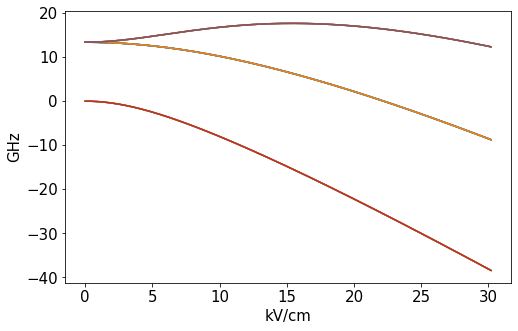

In [23]:
fig, ax= plt.subplots(figsize = (8,5))
ax.plot(Ez/1e3, spectrum[0][:,:16]/1e9)

ax.set_xlabel('kV/cm')
ax.set_ylabel('GHz')
set_fontsize(ax, 15)

In [24]:
Ez = np.linspace(0,60.2e3,501)
Ex = np.zeros(len(Ez))
Ey = np.zeros(len(Ez))
Bx = np.zeros(len(Ez))
By = np.zeros(len(Ez))
Bz = np.ones(len(Ez))*18.4

spectrum = Ham.spectrum(Ex,Ey,Ez,Bx,By,Bz)

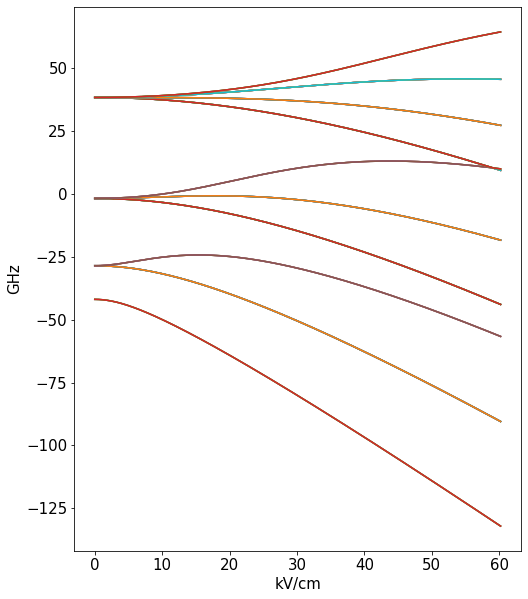

In [25]:
Jmax = 3
idx_max = np.sum([4*(2*J+1) for J in range(Jmax+1)])
fig, ax= plt.subplots(figsize = (8,10))
ax.plot(Ez/1e3, (spectrum[0][:,:64]-spectrum[0][:,:64].mean())/1e9)

ax.set_xlabel('kV/cm')
ax.set_ylabel('GHz')
set_fontsize(ax, 15)

In [26]:
Ez = np.linspace(0,70,501)
Ex = np.zeros(len(Ez))
Ey = np.zeros(len(Ez))
Bx = np.zeros(len(Ez))
By = np.zeros(len(Ez))
Bz = np.ones(len(Ez))*18.4

spectrum = Ham.spectrum(Ex,Ey,Ez,Bx,By,Bz)

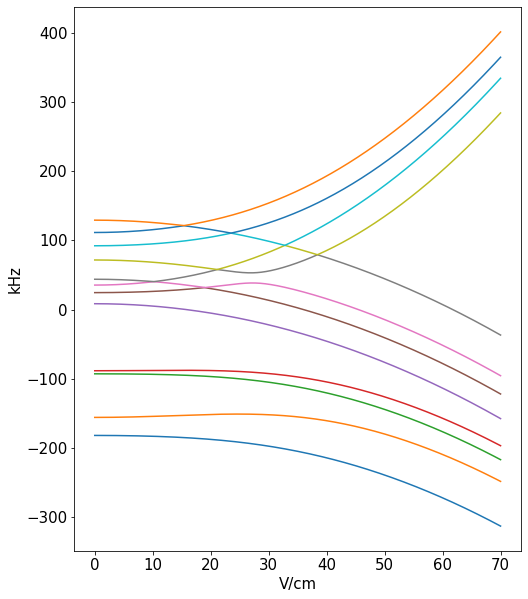

In [27]:
fig, ax= plt.subplots(figsize = (8,10))
ax.plot(Ez, (spectrum[0][:,4:16]-spectrum[0][:,4:16].mean())/1e3)

ax.set_xlabel('V/cm')
ax.set_ylabel('kHz')
set_fontsize(ax, 15)